**DATA SCIENCE INTERN @BHARAT INTERN**
By- Diksha

**TASK : TITANIC CLASSIFICATION**

Algorithm which tells whether the person will be save from sinking or not
Purpose
Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The dataset is available at Kaggle : https://www.kaggle.com/datasets/rahulsah06/titanic

# Problem understanding and definition
In this challenge, we need to complete the analysis of what sorts of people were most likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy

Predict whether passenger will survive or not.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collecting and processing...

In [3]:
titanic_data = pd.read_csv('/content/train.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [12]:
#how many survived?
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
#visualizing data
sns.set()

<Axes: ylabel='count'>

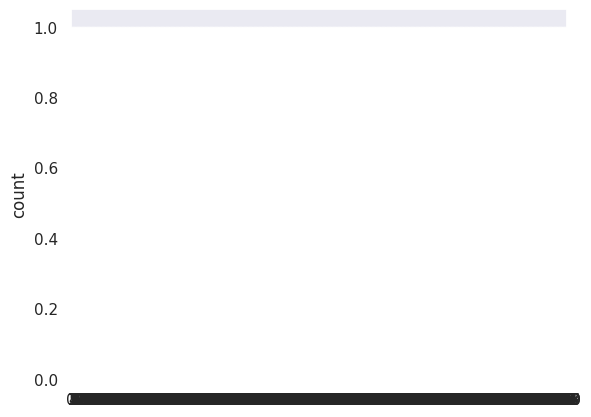

In [14]:
sns.countplot(titanic_data['Survived'])

In [15]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

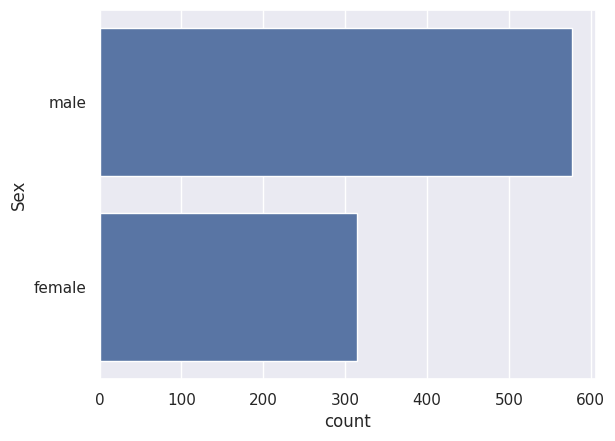

In [16]:
# count plot for "Sex" column
sns.countplot(titanic_data['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

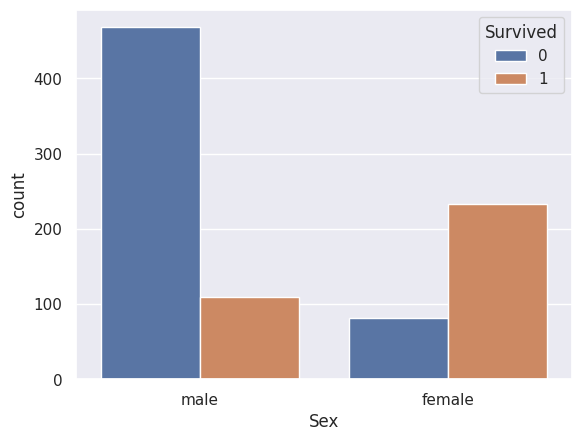

In [17]:
# Analysing Gender wise survivors
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

In [18]:
titanic_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

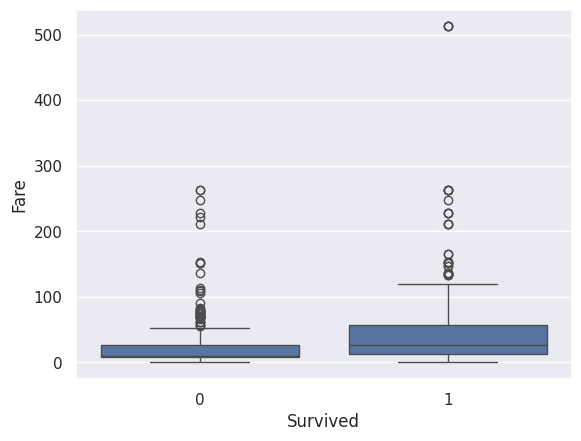

In [19]:
sns.boxplot(x='Survived',y='Fare',data=titanic_data);

Passengers who paid over 300

In [20]:
titanic_data[titanic_data['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


**The Captain went down with the ship**

"The captain goes down with the ship" is a maritime tradition that a sea captain holds ultimate responsibility for both his/her ship and everyone embarked on it, and that in an emergency, he/she will either save them or die trying.

In this case, Captain Edward Gifford Crosby went down with Titanic in a heroic gesture trying to save the passengers.

In [21]:
titanic_data[titanic_data['Name'].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


# Embarked, Pclass and Sex:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)


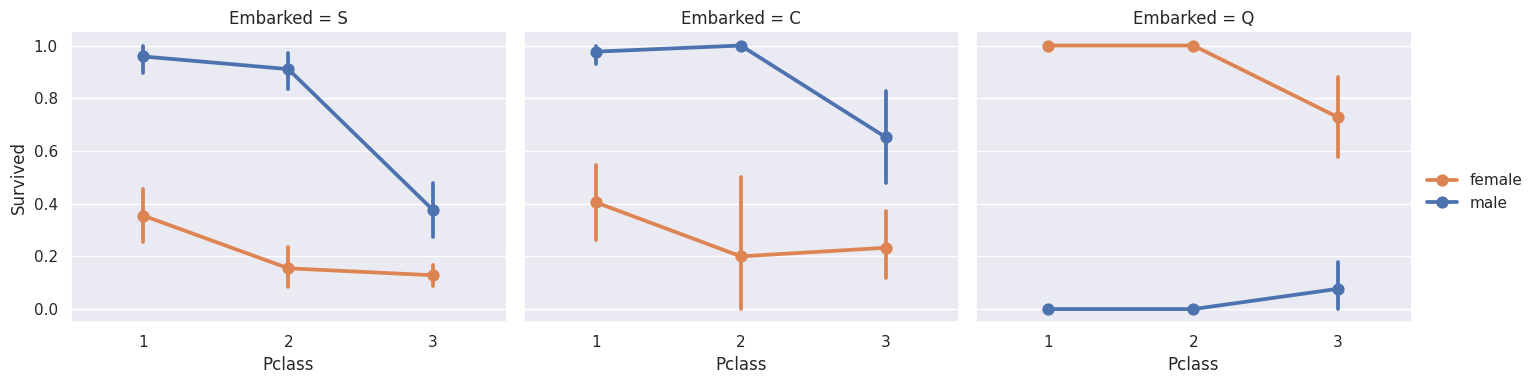

In [22]:
FacetGrid = sns.FacetGrid(titanic_data, col='Embarked', height=4, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep', order=None, hue_order=None)
FacetGrid.add_legend();

# Distribution of Pclass and Survived

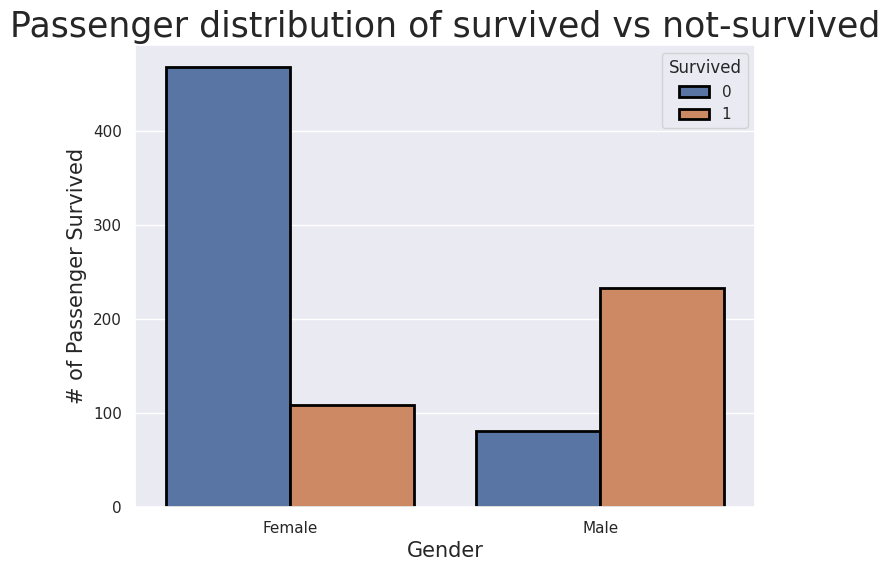

In [23]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = titanic_data, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(titanic_data.Survived.unique()),labels);

As previously mentioned, women are much more likely to survive than men. 74% of the women survived, while only 18% of men survived.

# Age and Sex distributions

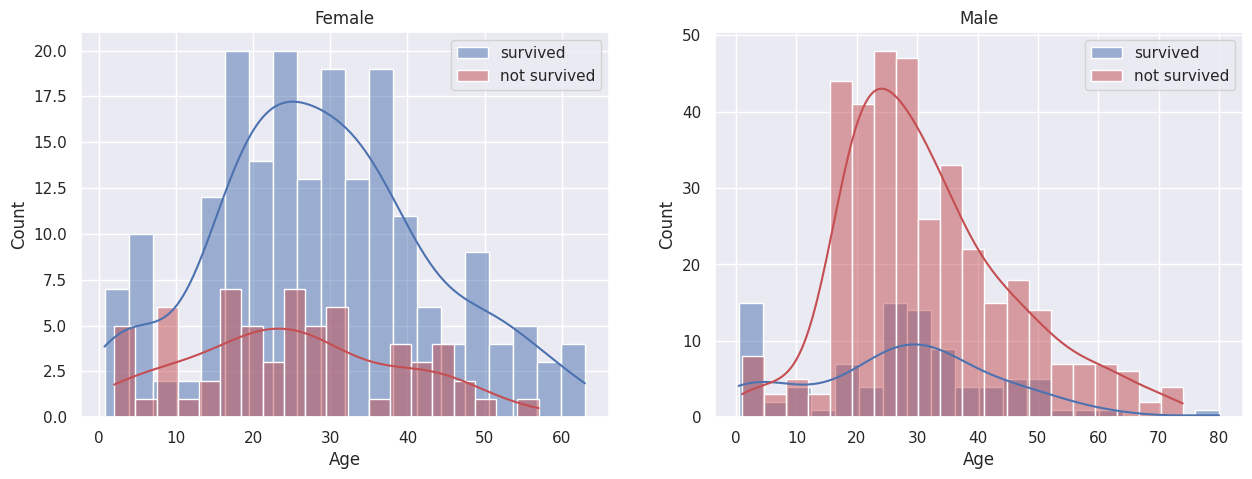

In [26]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = titanic_data[titanic_data['Sex']=='female']
men = titanic_data[titanic_data['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

We can see that men have a higher probability of survival when they are between 18 and 35 years old. For women, the survival chances are higher between 15 and 40 years old.

For men the probability of survival is very low between the ages of 5 and 18, and after 35, but that isn’t true for women. Another thing to note is that infants have a higher probability of survival.

# Passenger class distribution; Survived vs Non-Survived


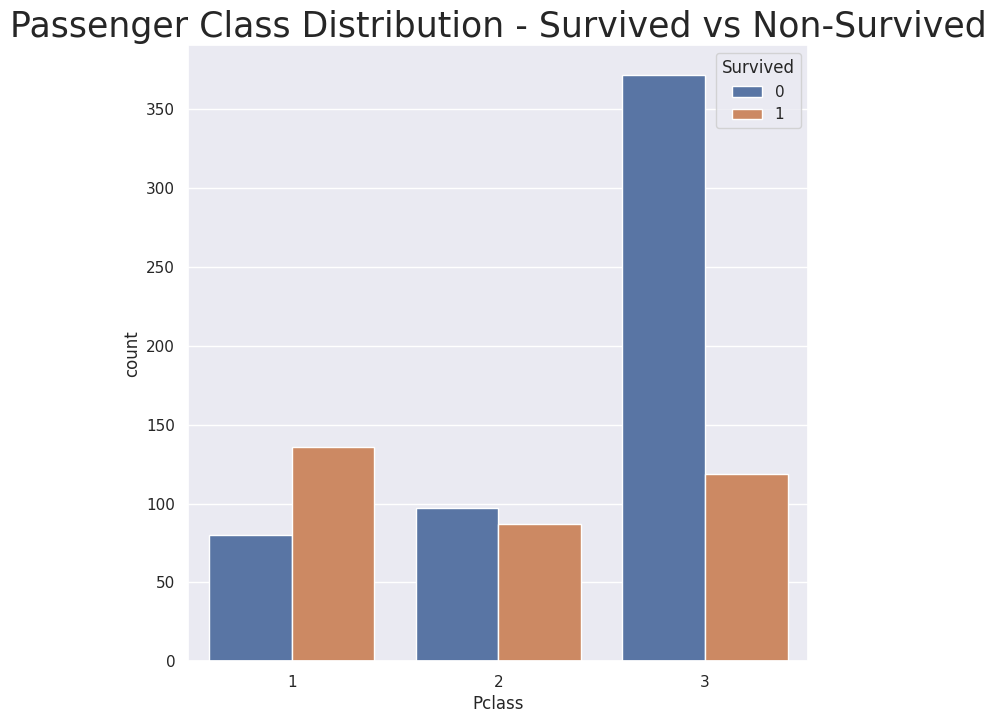

In [29]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=titanic_data)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25);

<ipython-input-30-c651192c793d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(titanic_data.loc[(titanic_data['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
<ipython-input-30-c651192c793d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(titanic_data.loc[(titanic_data['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')


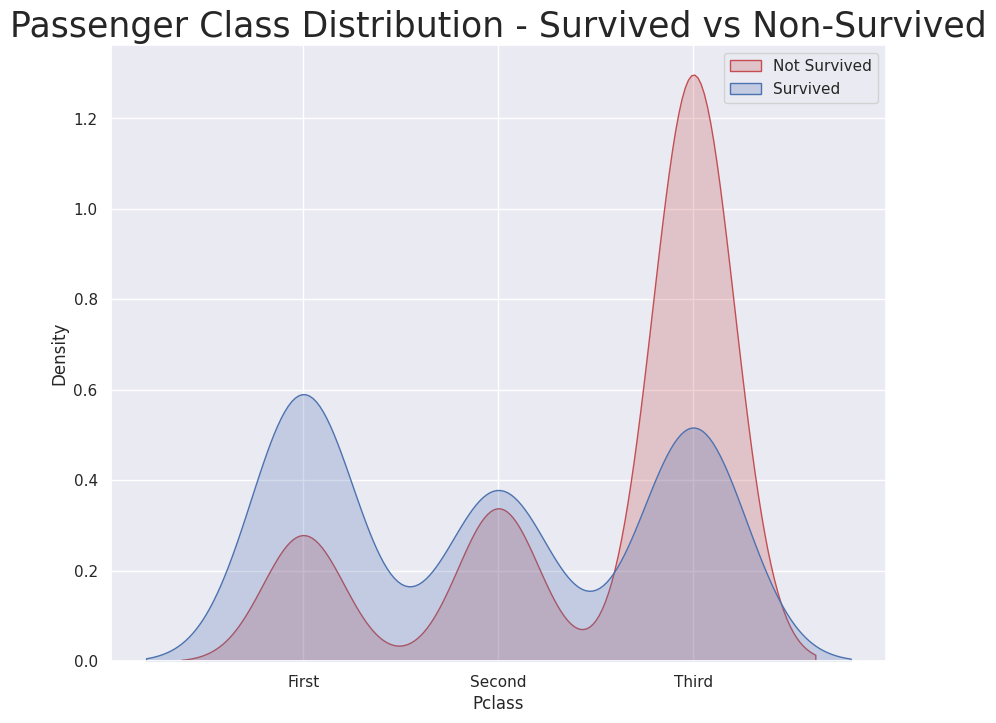

In [30]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(titanic_data.loc[(titanic_data['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(titanic_data.loc[(titanic_data['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(titanic_data.Pclass.unique()),labels);

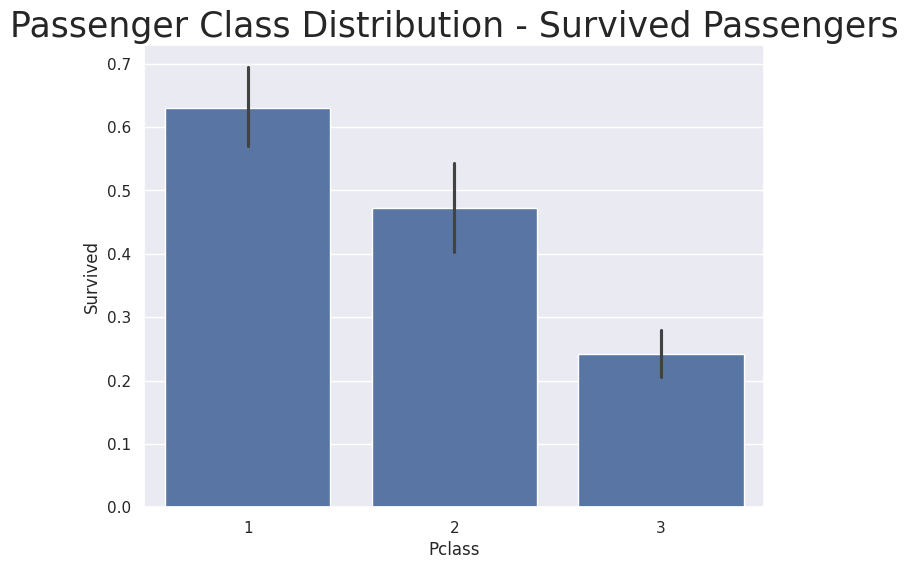

In [31]:
plt.subplots(figsize = (8,6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data);
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 25);

The graphs above clearly shows that economic status (Pclass) played an important role regarding the potential survival of the Titanic passengers. First class passengers had a much higher chance of survival than passengers in the 3rd class. We note that:

63% of the 1st class passengers survived the Titanic wreck

48% of the 2nd class passengers survived

Only 24% of the 3rd class passengers survived

# Correlation Matrix and Heatmap

In [32]:
df_num = titanic_data[['Age','SibSp','Parch','Fare']]
df_cat = titanic_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

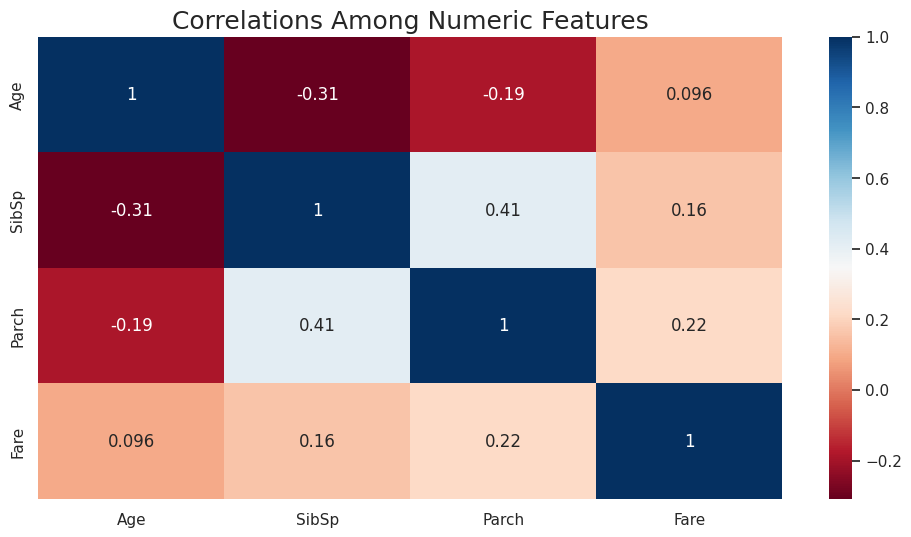

In [34]:
plt.subplots(figsize = (12,6))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

We notice from the heatmap above that:

Parents and sibling like to travel together (light blue squares)

Age has a high negative correlation with number of siblings

# Feature Engineering and Data Processing

Feature Engineering is the process of using raw data to create features that will be used for predictive modeling. Using, transforming, and combining existing features to define new features are also considered to be feature engineering.

# Drop 'PassengerId'
First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons' survival probability. I will not drop it from the test set, since it is required for the submission.

In [35]:
titanic_data = titanic_data.drop(['PassengerId'], axis=1)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Combining SibSp and Parch
SibSp and Parch would make more sense as a combined feature that shows the total number of relatives a person has on the Titanic. I will create the new feature 'relative' below, and also a value that shows if someone is not alone.



# Missing Data
As a reminder, we have to deal with Cabin (687 missing values), Embarked (2 missing values) and Age (177 missing values).

In [37]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [titanic_data, titanic_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [38]:
test_df = pd.read_csv('/content/test.csv')

In [39]:
titanic_data = titanic_data.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

# Age
As seen previously on "3.1 Dealing with Missing Values", there are a lot of missing 'Age' values (177 data points). We can normalize the 'Age' feature by creating an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null

In [40]:
data = [titanic_data, test_df]

for dataset in data:
    mean = titanic_data["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic_data["Age"].astype(int)

In [41]:
titanic_data["Age"].isnull().sum()

0

# Embarked
Since the Embarked feature has only 2 missing values, we will fill these with the most common one.

In [42]:
titanic_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [43]:
common_value = 'S'
data = [titanic_data, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [44]:

titanic_data['Embarked'].isnull().sum()

0

# Converting Features


In [45]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


We can see that 'Fare' is a float data-type. Also, we need to deal with 4 categorical features: Name, Sex, Ticket, and Embarked

**Fare**

Converting 'Fare' from float64 to int64 using the astype() function provided by pandas

In [46]:
data = [titanic_data, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [47]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Name      891 non-null    object
 3   Sex       891 non-null    object
 4   Age       891 non-null    int64 
 5   SibSp     891 non-null    int64 
 6   Parch     891 non-null    int64 
 7   Ticket    891 non-null    object
 8   Fare      891 non-null    int64 
 9   Embarked  891 non-null    object
 10  Deck      891 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 76.7+ KB


**Name**

Feature Engineering the name of passengers to extract a person's title (Mr, Miss, Master, and Other), so we can build another feature called 'Title' out of it.

In [48]:
data = [titanic_data, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

    # Filling NaN with 0 just to be safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [50]:
titanic_data = titanic_data.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [51]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,8,1
1,1,1,female,38,1,0,PC 17599,71,C,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,8,2
3,1,1,female,35,1,0,113803,53,S,3,3
4,0,3,male,35,0,0,373450,8,S,8,1


**Sex**

Convert feature 'Sex' into numeric values

male = 0

female = 1

In [52]:
genders = {"male": 0, "female": 1}
data = [titanic_data, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [53]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,8,1
1,1,1,1,38,1,0,PC 17599,71,C,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,8,2
3,1,1,1,35,1,0,113803,53,S,3,3
4,0,3,0,35,0,0,373450,8,S,8,1


**Ticket**

In [54]:
titanic_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the 'Ticket' feature has 681 unique values, it would be very hard to convert them into an useful feature. Hence, we will drop it from the DataFrame.

In [55]:
titanic_data = titanic_data.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,S,8,1
1,1,1,1,38,1,0,71,C,3,3
2,1,3,1,26,0,0,7,S,8,2
3,1,1,1,35,1,0,53,S,3,3
4,0,3,0,35,0,0,8,S,8,1


# Creating new Categories

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
train_df = pd.read_csv('/content/train.csv')

In [8]:
test_df = pd.read_csv('/content/test.csv')

**Fare**

For the 'Fare' feature, we need to do the same as with the 'Age' feature. But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use pandas "qcut()" function, that we can use to see, how we can form the categories.

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
pd.qcut(train_df['Fare'], q=6)

0        (-0.001, 7.775]
1      (52.369, 512.329]
2         (7.775, 8.662]
3      (52.369, 512.329]
4         (7.775, 8.662]
             ...        
886      (8.662, 14.454]
887       (26.0, 52.369]
888       (14.454, 26.0]
889       (26.0, 52.369]
890      (-0.001, 7.775]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.775] < (7.775, 8.662] < (8.662, 14.454] <
                                           (14.454, 26.0] < (26.0, 52.369] < (52.369, 512.329]]

# Model building

In [15]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

**Stochastic Gradient Descent (SGD)**

In [17]:
%matplotlib inline
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()